# EDA and Stakeholder Questions Notebook

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
def get_percentage_summary(label, x, y):
    percentage = round(x/y, 3)
    summary = str(percentage) + '% ' + label
    return summary

In [3]:
# read in the processed data
df = pd.read_csv('../data/train_processed_labeled.csv')
print(df.shape)
df.head(3)

(57565, 45)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,source_type,source_class,waterpoint_type,waterpoint_type_group,recorded_year,waterpoint_age,region_code_and_name,recorded_good_quality,recorded_good_quantity,status_group
0,69572,"6,000.00",2011-03-14,roman,1390,Roman,34.94,-9.86,none,lake nyasa,...,spring,groundwater,communal standpipe,communal standpipe,2011,12,iringa_11,True,True,functional
1,8776,0.00,2013-03-06,grumeti,1399,GRUMETI,34.70,-2.15,zahanati,lake victoria,...,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,mara_20,True,False,functional
2,34310,25.00,2013-02-25,lottery club,686,World vision,37.46,-3.82,kwa mahundi,pangani,...,dam,surface,communal standpipe multiple,communal standpipe,2013,4,manyara_21,True,True,functional


# Processed Data Column Descriptions

* id - Numeric identifer for the waterpoint
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location,  NOTE: Hierarchy is Region > LGA > Ward
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
* recorded_year -  Pulling out the year from date_recorded
* waterpoint_age - Calculate as recorded_year - construction_year
* region_with_code - Combine region and region_code. There are more region_code values than region values
* recorded_good_quality - True if quality_group == 'good', False if anything other than 'good'
* recorded_good_quantity - True if quanity_group == 'sufficient', False if anythign other than 'sufficient'
* status_group - Operational status (these are the 3 classes we will attempt to predict on Test data)
 
 

## Q1: What is the operational status of waterponts in Tanzania?
### Q1a: What is the overall waterpoint Operational Status?


In [4]:
by_op_status = df.groupby('status_group')['id'].count()
by_op_status.sort_values(ascending=False, inplace=True)

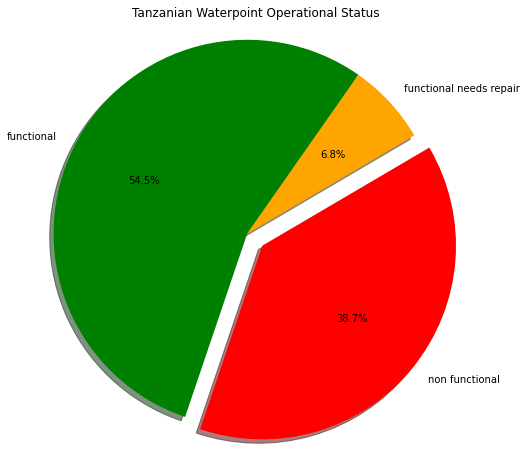

In [5]:
plfig = plt.figure(figsize = (8, 8))
my_explode = (0, 0.1, 0)
my_colors = ['green', 'red', 'orange']
plt.pie(by_op_status, labels=by_op_status.index, autopct='%1.1f%%', startangle=55, shadow =True, colors=my_colors, explode=my_explode)
plt.title('Tanzanian Waterpoint Operational Status')

plt.axis('equal')
plt.show()

### Q1b: What is the breakdown of waterpoint operational status by Region?


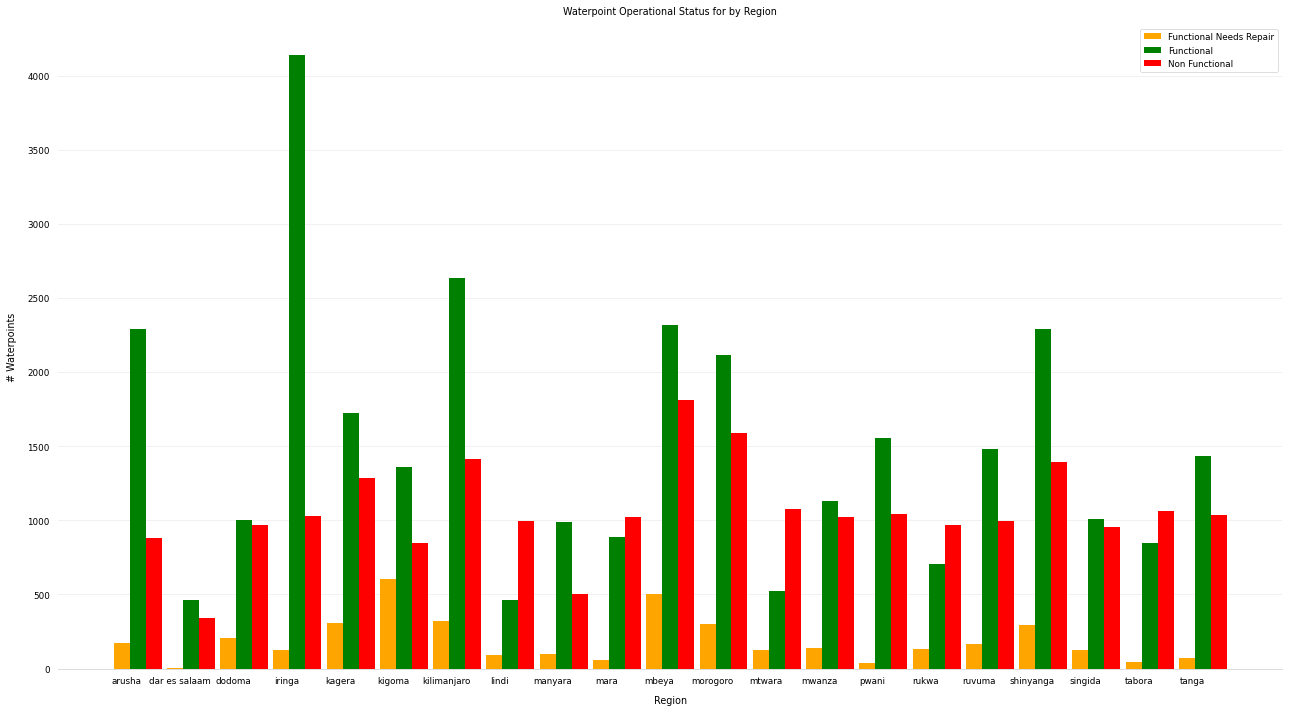

In [6]:
# Use Seaborn's context settings to make fonts larger.
sns.set_context('paper')

# Create a grouped bar chart, with region as the x-axis and status_group as the variable we're grouping on
fig, ax = plt.subplots(figsize=(18, 10))

# Our x-axis. We just want a list of numbers from zero with a value for each of the regions.
x = np.arange(len(df.region.unique()))

# Define bar width. We need this to offset the additional bars.
bar_width = 0.3

b1_series = df[df['status_group'] == 'functional needs repair'].groupby('region')['id'].count().sort_index()
b2_series = df[df['status_group'] == 'functional'].groupby('region')['id'].count().sort_index(0)
b3_series = df[df['status_group'] == 'non functional'].groupby('region')['id'].count().sort_index()


b1 = ax.bar(x, b1_series, width=bar_width, label='Functional Needs Repair', color='orange')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, b2_series, width=bar_width, label='Functional', color='green')
 # Same thing, but offset the x again
b3 = ax.bar(x +(bar_width*2), b3_series, width=bar_width, label='Non Functional', color='red')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 3)
ax.set_xticklabels(b1_series.index)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=10)
ax.set_ylabel('# Waterpoints', labelpad=10)
ax.set_title('Waterpoint Operational Status for by Region', pad=10)
fig.tight_layout()


## Q2: What is the reported Quality and Quantity of Working (Functioning and Functioning Needs Repair) waterpoints?
### Q2a: For All Working waterpoints, what is the breakdown of water quality by Region?
### Q2b: For All Working waterpoints, what is the water quantity By Region?

In [7]:
#Quality group
working_by_region_quality = df[df['status_group'] != 'non functional'].groupby(['region', 'recorded_good_quality'])['id'].count()
#Quantity group
working_by_region_quantity = df[df['status_group'] != 'non functional'].groupby(['region', 'recorded_good_quantity'])['id'].count()

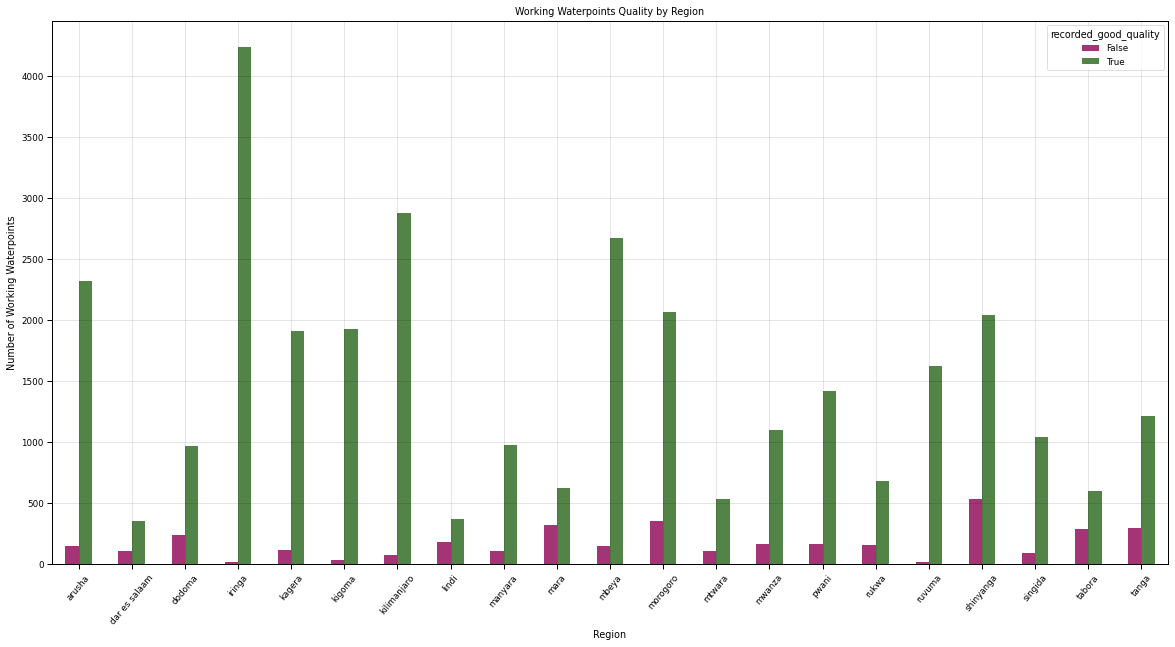

In [8]:
working_by_region_quality.unstack().plot.bar(rot=50, alpha = 0.80, figsize=(20,10), colormap='PiYG', title='Working Waterpoints Quality by Region')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Region')
plt.ylabel('Number of Working Waterpoints')
plt.show()

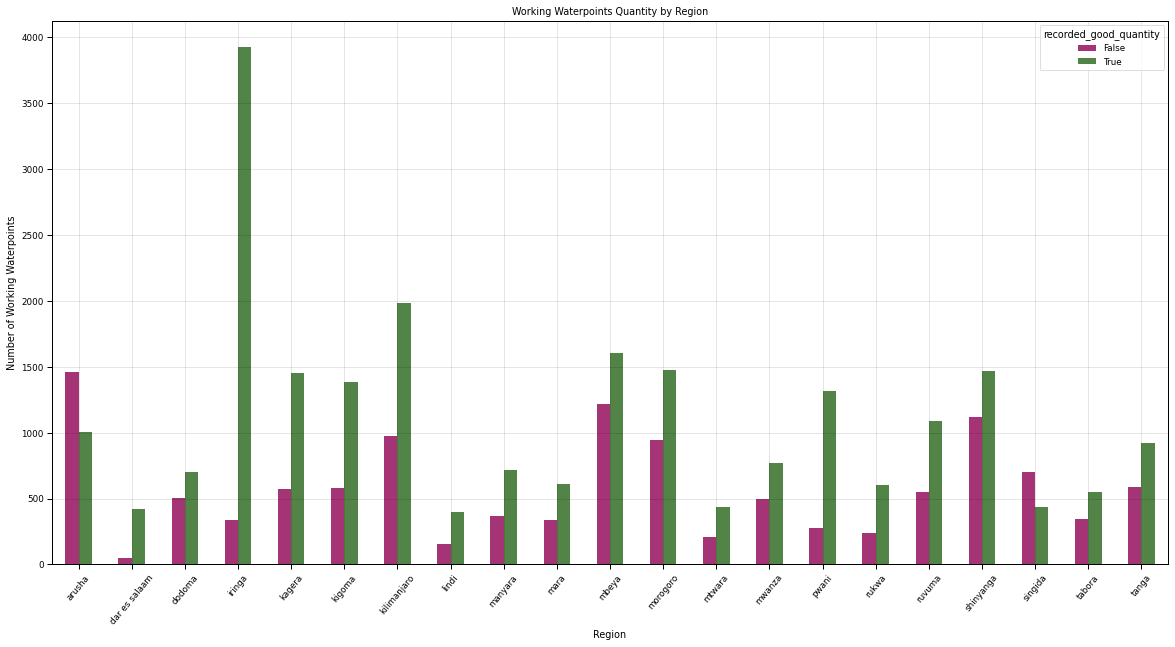

In [9]:
working_by_region_quantity.unstack().plot.bar(rot=50, alpha = 0.80, figsize=(20,10), colormap='PiYG', title='Working Waterpoints Quantity by Region')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Region')
plt.ylabel('Number of Working Waterpoints')
plt.show()

### Insights about the quality and quantity of Working waterpoints by Region.
* All 21 Regions have a higher number of 'good quality' waterpoints than 'insuffient quality' waterpoints.
* 19 of the 21 Regions have a higher number of 'good/suffient quantity' waterpoints than 'insuffient quantity' waterpoints. 
* 2 of the 21 Regions have a higher number of 'insuffient quantity' waterpoints than 'good/suffient quantity' waterpoints.

### Recommendations:
* The regions of Indi, Mara, and Singida could potentially benefit from a water needs assement. These regions have a higher ratio of "insuffient quality" to "good quality" waterpoints than the other Regions.
* The Arusha and Singida regions could potentally benefit from a water needs assement. These arre the only regions with a higher number of 'insuffient quantity' waterpoints than 'suffient quantity' waterpoints. 

## Q3: Is there a d difference between Average Age of Waterpoints by Operation Status?
### Q3a: Is there a difference  between the average age of Working (functional and functional but needs repair) and Non Functional waterpoints?

#### NOTE: 4 Regions do not have construction year for their waterpoints: Mbeya, Dodoma, Kagera, Tabora

In [10]:
df.groupby('region')['construction_year'].max().sort_values()

region
mbeya               0
dodoma              0
kagera              0
tabora              0
dar es salaam    2010
pwani            2011
mwanza           2011
morogoro         2011
tanga            2011
iringa           2011
mara             2012
rukwa            2012
shinyanga        2012
singida          2012
lindi            2013
kilimanjaro      2013
mtwara           2013
kigoma           2013
ruvuma           2013
manyara          2013
arusha           2013
Name: construction_year, dtype: int64

### We do not have construction year for any waterpoints in the Dodoma, Kagera, Mbeya or Tabora regions, so we cannot calculate waterpoint age for them.

In [15]:
working_by_region_mean_age = df[df['status_group'] != 'non functional'].groupby('region')['waterpoint_age'].mean().sort_index()
non_functional_by_region_mean_age = df[df['status_group'] == 'non functional'].groupby('region')['waterpoint_age'].mean().sort_index()

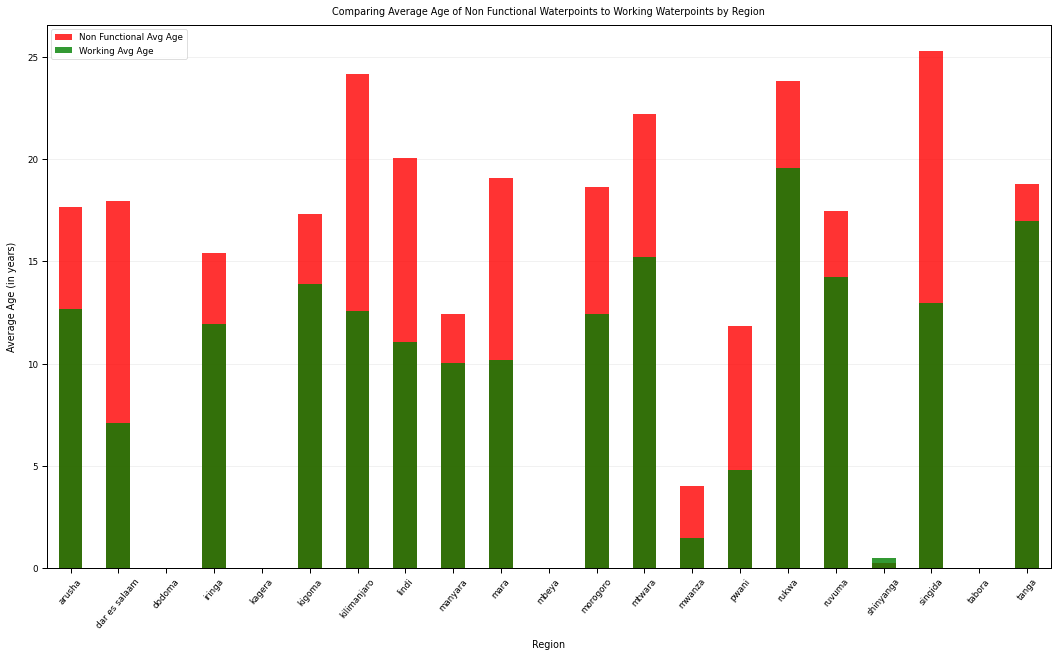

In [16]:
ax = non_functional_by_region_mean_age.plot(kind='bar', alpha=.8, rot=50, color='red', figsize=(18, 10))
working_by_region_mean_age.plot(kind='bar', rot=50, alpha=.8, ax=ax, color="green")

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=10)
ax.set_ylabel('Average Age (in years)', labelpad=10)
ax.set_title('Comparing Average Age of Non Functional Waterpoints to Working Waterpoints by Region', pad=10)
ax.legend(['Non Functional Avg Age', 'Working Avg Age'])


In [20]:
# Get the difference between the average age of all working (functional and functional needs repair) 
# and non functional waterpoints by Region
means_zipped = zip(non_functional_by_region_mean_age.values, working_by_region_mean_age.values)
age_diffs = []

for item in means_zipped:
    diff_non_to_functional = round(item[0] - item[1], 2)
    age_diffs.append(diff_non_to_functional)

labled_age_diffs = zip(working_by_region_mean_age.index, age_diffs)

for tup in labled_age_diffs:
    print(tup[0].capitalize(), ': Diff between average Working and Non-Functional waterpoints: ', tup[1], 'years')

Arusha : Diff between average Working and Non-Functional waterpoints:  4.98 years
Dar es salaam : Diff between average Working and Non-Functional waterpoints:  10.85 years
Dodoma : Diff between average Working and Non-Functional waterpoints:  0.0 years
Iringa : Diff between average Working and Non-Functional waterpoints:  3.5 years
Kagera : Diff between average Working and Non-Functional waterpoints:  0.0 years
Kigoma : Diff between average Working and Non-Functional waterpoints:  3.44 years
Kilimanjaro : Diff between average Working and Non-Functional waterpoints:  11.57 years
Lindi : Diff between average Working and Non-Functional waterpoints:  9.01 years
Manyara : Diff between average Working and Non-Functional waterpoints:  2.38 years
Mara : Diff between average Working and Non-Functional waterpoints:  8.91 years
Mbeya : Diff between average Working and Non-Functional waterpoints:  0.0 years
Morogoro : Diff between average Working and Non-Functional waterpoints:  6.2 years
Mtwara :

### Q3a Insights and Recommendations

#### The average age of Non Functional waterpoints is greater than the average age of Working waterpoints in all regions except Shinyanga. 
__NOTE__: Regions with no recorded construction year are not included

This measurement supports intution that older waterpoints are more likely to be non functional. 

#### Recommendation:
Regions that have Working waterpoints with average age close to average age of Non Functional waterpoints.
should consider increasing maintance and/or new waterpoint installation. 
* Tanga
* Manyara
* Ruvuma


### Q3b: Is there a difference between average age of Functional Needs Repair and Functional waterpoints?

In [21]:
functional_by_region_mean_age = df[df['status_group'] == 'functional'].groupby('region')['waterpoint_age'].mean().sort_index()
functional_needs_repair_by_region_mean_age = df[df['status_group'] == 'functional needs repair'].groupby('region')['waterpoint_age'].mean().sort_index()

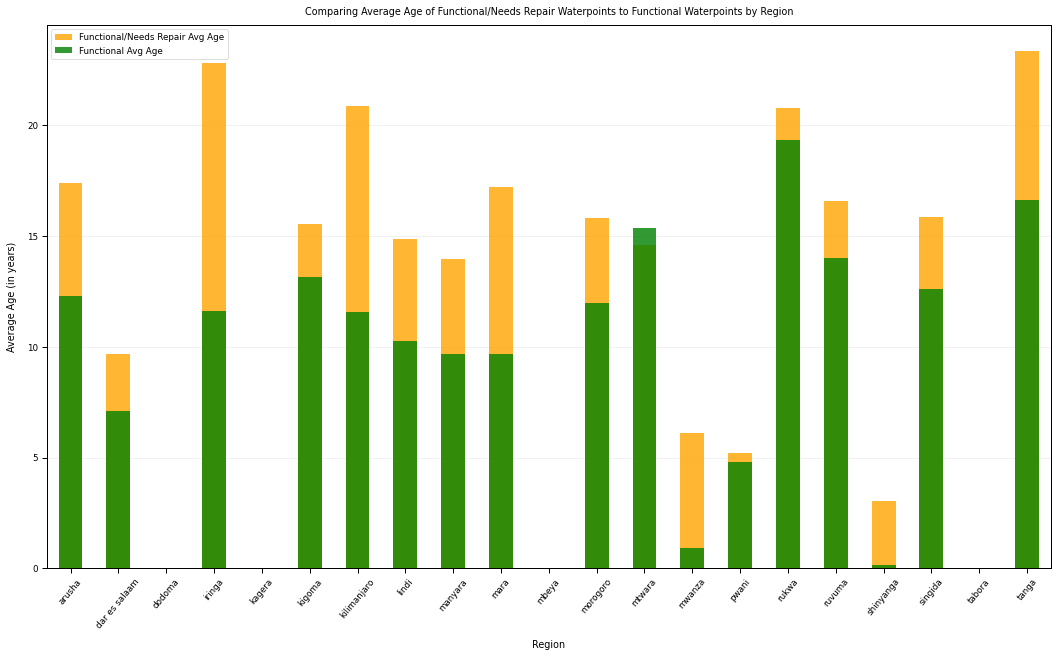

In [22]:
ax = functional_needs_repair_by_region_mean_age.plot(kind='bar', alpha=.8, rot=50, color='orange', figsize=(18, 10))
functional_by_region_mean_age.plot(kind='bar', rot=50, alpha=.8, ax=ax, color="green")

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=10)
ax.set_ylabel('Average Age (in years)', labelpad=10)
ax.set_title('Comparing Average Age of Functional/Needs Repair Waterpoints to Functional Waterpoints by Region', pad=10)
ax.legend(['Functional/Needs Repair Avg Age', 'Functional Avg Age'])

In [23]:
# Get the difference between the average age of all Functional needs repair and Functional waterpoints by Region
means_zipped = zip(functional_needs_repair_by_region_mean_age.values, functional_by_region_mean_age.values)
age_diffs = []

for item in means_zipped:
    diff_non_to_functional = round(item[0] - item[1], 2)
    age_diffs.append(diff_non_to_functional)

functioning_labled_age_diffs = zip(functional_needs_repair_by_region_mean_age.index, age_diffs)

for tup in functioning_labled_age_diffs:
    print(tup[0].capitalize(), ': Diff between average age of Functional Needs Repair and Functional waterpoints: ', tup[1], 'years')

Arusha : Diff between average age of Functional Needs Repair and Functional waterpoints:  5.07 years
Dar es salaam : Diff between average age of Functional Needs Repair and Functional waterpoints:  2.58 years
Dodoma : Diff between average age of Functional Needs Repair and Functional waterpoints:  0.0 years
Iringa : Diff between average age of Functional Needs Repair and Functional waterpoints:  11.2 years
Kagera : Diff between average age of Functional Needs Repair and Functional waterpoints:  0.0 years
Kigoma : Diff between average age of Functional Needs Repair and Functional waterpoints:  2.41 years
Kilimanjaro : Diff between average age of Functional Needs Repair and Functional waterpoints:  9.29 years
Lindi : Diff between average age of Functional Needs Repair and Functional waterpoints:  4.56 years
Manyara : Diff between average age of Functional Needs Repair and Functional waterpoints:  4.31 years
Mara : Diff between average age of Functional Needs Repair and Functional waterpo

### Q3b: Insights and Recommendations
#### The average age of Functional Needs Repair waterpoints is greater than Functional waterpoints in all Regions but one: Mtwara. 
__NOTE__: Regions with no recorded construction year are not included

This measurement supports intution that waterpoints in need of repair would tend to be older.

#### Recommendation:
Regions that have Working waterpoints with average age approaching to average age of waterpoints that need repair should consider increasing monitoring/preventative mainteance of the targeted waterpoints. 
* Pwani
* Rukwa
* Kigoma




## Future Work questions

### For All Working waterpoints (Functioning and Functioning Needs Repair): 
* what are payment types by Region?
* what are the recorded populations served by Region?
* what are the source_classes or source_type?
* who are the installers?
* who are the management groups?

### For ALL waterpoints
* who are the management groups Grouped By Region, then Status?
* who are the installers Grouped By Region, then Status?


### For Non Functioning waterpoints: 
* who are the installers?
* who are the management groups?


### How many people use waterpoints? Entire country sum, breakdown by region, water basin.

### For lower QUALITY waterpoints, Defined as quality_group anything other than 'good' and/or quantity_group listed as 'insufficient, what is the population count, Where are they located (region, waterbasin, lat/long)

### For lower QUANTITY waterpoints, Defined as quantity_group listed as 'insufficient', what is the population count, where are they located (region, waterbasin, lat/long)


### What do we know about the payment types for waterpoints? Breakdown by country, region water basin, population bins


### What do we know about waterpoint age? Country wide, water basin wide, region wide? Min, Max, Median, Mean, Dist? 

### How up-to-date is the data for waterpoints by region? Are there trends in missing values? Are some regions missing more data than others?

### What do we know about waterpoints of unknown age? What is the population served by waterpoints of unknown age? How many, where are they (region, waterbasin, lat/long)

### What do we know about the waterpoint_type_group? Breakdown by country, region, water basin, bin by population. (communal standpipe' 'hand pump' 'other' 'improved spring''cattle trough' 'dam')

### What is the breakdown of Orgs that perform management for the waterpoints?   Any managed that don't have a permit or permit status unknown.  Use the  management column not scheme_management (scheme indicates the funding mechanism, I think)  Is there a difference between scheme_management and management entities for waterpoints? If so, what does that look like?
13 total: 'vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust'

### What is the breakdown of extraction type /extraction type class by country, region, water basin. 
 